Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3178
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2209
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2098
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.2042
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2003
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1978
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1961
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1943
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1927
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1918
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


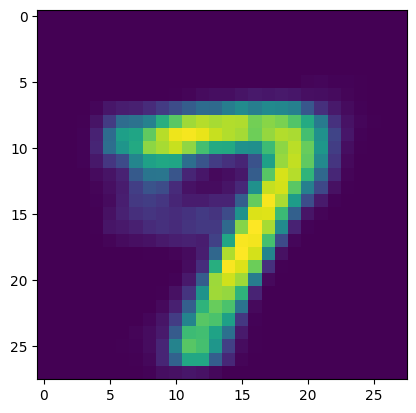

In [ ]:
import tensorflow as tf
from keras import layers, models
import matplotlib.pyplot as plt
from keras.datasets import mnist # type: ignore

(x_train, _), (x_test, _) = mnist.load_data()
x_train, x_test = x_train /255, x_test/255

latent_dim = 2
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Flatten()(inputs)
x = layers.Dense(128, activation='relu')(x)

z_mean = layers.Dense(latent_dim)(x)
z_var = layers.Dense(latent_dim)(x)

z = layers.Lambda(lambda args: args[0] + args[1] * tf.random.normal(tf.shape(args[1])))([z_mean, z_var])

decoder_h = layers.Dense(128, activation='relu')(z)
decoder_mean = layers.Dense(28*28, activation='sigmoid')(decoder_h)

vae_output = layers.Reshape((28, 28, 1))(decoder_mean)
vae = models.Model(inputs, vae_output)
vae.compile(optimizer='adam', loss='binary_crossentropy')

vae.fit(x_train, x_train, batch_size=128, epochs=10)

decoded = vae.predict(x_test)

plt.imshow(decoded[0])
plt.show()